Q1. What is the mathematical formula for a linear SVM?

Certainly! The mathematical formula for a linear Support Vector Machine (SVM) involves defining the decision boundary. Here it is:

[ f(X) = w^T . X + b \]

In this equation:
- \(w\) represents the weight vector that we want to minimize.
- \(X\) corresponds to the data we're classifying.
- \(b\) is the linear coefficient estimated from the training data.

This formula defines the decision boundary that the SVM returns¹².

Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) aims to find the optimal hyperplane that maximizes the margin between classes while minimizing classification errors. Mathematically, it can be expressed as:

\[ \min_{w, b} \frac{1}{2} \|w\|^2 \]

subject to:

\[ y_i(w^T x_i + b) \geq 1 \quad \text{for all } i \]

where:
- \(w\) represents the weight vector.
- \(b\) is the bias term.
- \(x_i\) and \(y_i\) are the training data points and their corresponding labels.

The SVM seeks to minimize the norm of the weight vector while ensuring that all data points lie outside the margin (i.e., \(y_i(w^T x_i + b) \geq 1\)).

Q3. What is the kernel trick in SVM?

The **kernel trick** is a powerful technique used in **Support Vector Machines (SVMs)** to handle non-linear data. Let's break it down:

1. **Linear vs. Non-Linear Problems**:
   - SVMs work well for linearly separable data, where a hyperplane can cleanly divide the classes.
   - However, many real-world problems involve non-linear data, making direct linear separation impossible.

2. **Concept of Feature Mapping**:
   - To deal with non-linear data, we can map it into a higher-dimensional space where it becomes linearly separable.
   - This transformation involves projecting the data into a new feature space.

3. **Kernel Trick**:
   - The kernel trick allows SVMs to implicitly map data into a higher-dimensional space without explicitly calculating the coordinates in that space.
   - By applying a kernel function, SVMs find a linear separator (hyperplane) in this higher-dimensional feature space.
   - This avoids the computational cost of directly working in the higher-dimensional space.

4. **Types of Kernel Functions**:
   - **Linear Kernel**: Assumes data is already linearly separable.
   - **Polynomial Kernel**: Maps inputs into a polynomial feature space, capturing feature interactions.
   - **Radial Basis Function (RBF) Kernel**: Useful for complex regions by considering distances between points.
   - **Sigmoid Kernel**: Mimics neural networks using a sigmoid function as the kernel¹.

In summary, the kernel trick enables SVMs to handle non-linear data efficiently by transforming it into a higher-dimensional space where linear separation becomes feasible. 🚀



Certainly! Below is a Python program that demonstrates how the kernel trick can handle non-linear data using a Support Vector Machine (SVM) with an RBF kernel. We’ll use the popular scikit-learn library for this purpose.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
# Generate synthetic non-linear data
X, y = datasets.make_circles(n_samples=100, factor=0.3, noise=0.2, random_state=42)


In [4]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Train an SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=1.0, C=1.0)
svm_rbf.fit(X_train, y_train)


SVC(gamma=1.0)

In [6]:
# Make predictions
y_pred = svm_rbf.predict(X_test)


In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.90


In [10]:
# Plot the decision boundary
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(f"SVM with RBF Kernel\nAccuracy: {accuracy:.2f}")

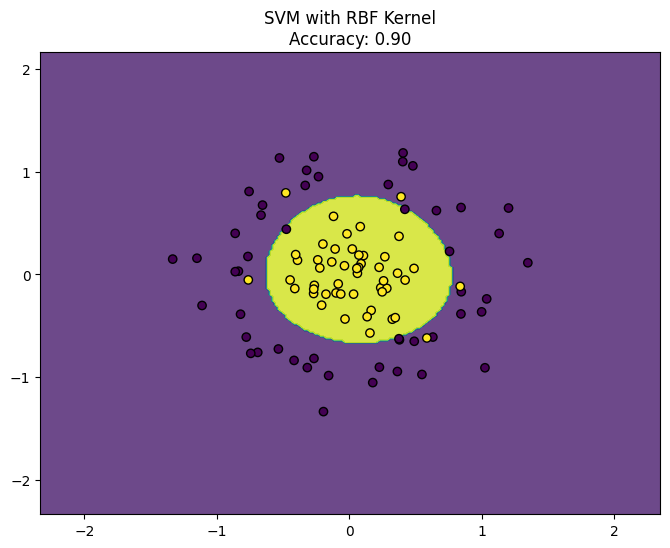

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm_rbf, X, y, ax)
plt.show()

##Example: Using the Breast Cancer Dataset with a Non-Linear Kernel
Here’s how to use the Breast Cancer dataset to show SVM with a non-linear kernel:



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [25]:
# Load the Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target


In [26]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [29]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Note: Breast Cancer dataset is high-dimensional, so visualization is challenging.
# For visualization, you might need to use dimensionality reduction techniques like PCA.


1. Apply PCA to reduce the feature space to 2 dimensions for visualization.

2. Train the SVM using the PCA-reduced data.
3. Visualize the decision boundary on the PCA-reduced data.





In [30]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [31]:
# Split PCA-transformed data into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [32]:
# Train SVM with RBF kernel on PCA-reduced data
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf.fit(X_train_pca, y_train)

SVC(gamma=0.5)

In [33]:
# Make predictions
y_pred = svm_rbf.predict(X_test_pca)

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [35]:
# Plot decision boundary
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(f"SVM with RBF Kernel\nAccuracy: {accuracy:.2f}")

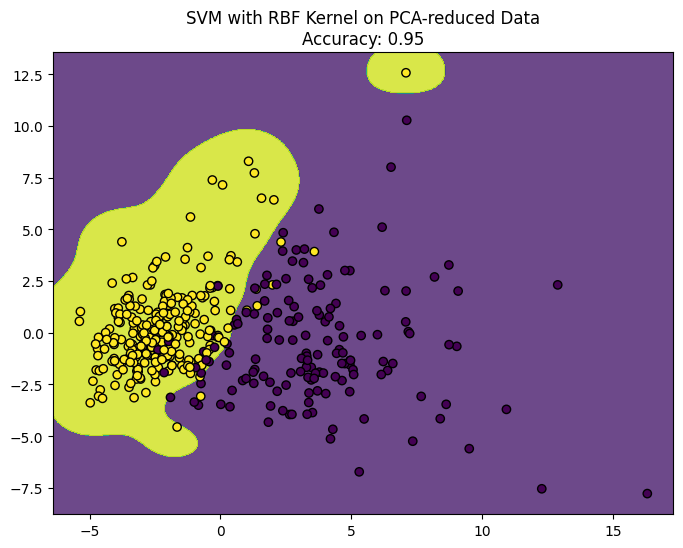

In [36]:
# Plotting decision boundary on PCA-reduced data
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm_rbf, X_train_pca, y_train, ax)
plt.title(f"SVM with RBF Kernel on PCA-reduced Data\nAccuracy: {accuracy:.2f}")
plt.show()

In [39]:
df = pd.read_csv('/content/spambase.data', header=None)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Accuracy: 0.79


ValueError: X has 2 features, but SVC is expecting 57 features as input.

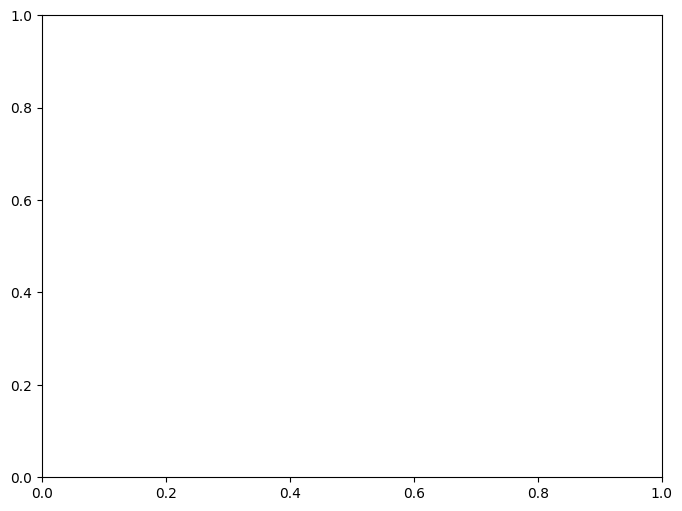

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score



# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train an SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# For visualization, we need to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(f"SVM with RBF Kernel\nAccuracy: {accuracy:.2f}")

# Plotting (using PCA-reduced features for visualization)
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm_rbf, X_pca, y, ax)
plt.show()


Accuracy: 0.79


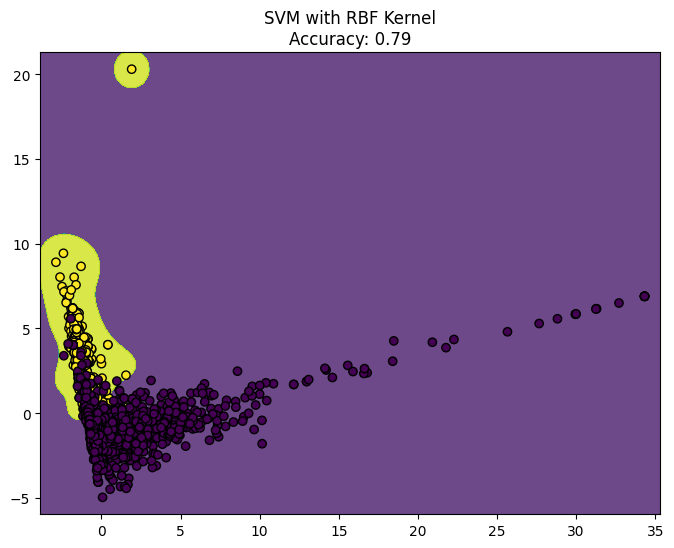

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Spambase dataset
# Make sure to replace 'spambase.data' with the path to your dataset file
df = pd.read_csv('spambase.data', header=None)

# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train an SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train SVM with PCA-transformed training data
svm_rbf_pca = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_rbf_pca.fit(X_train_pca, y_train)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(f"SVM with RBF Kernel\nAccuracy: {accuracy:.2f}")

# Plotting (using PCA-reduced features for visualization)
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm_rbf_pca, X_pca, y, ax)
plt.show()


Q4. What is the role of support vectors in SVM Explain with example

In Support Vector Machines (SVMs), support vectors play a crucial role in defining the optimal hyperplane that separates different classes. Here’s a detailed explanation:

### Role of Support Vectors

1. **Defining the Margin**: Support vectors are the data points that lie closest to the decision boundary (hyperplane). They are critical because they determine the width of the margin. The margin is the distance between the hyperplane and the closest data points from either class. The optimal hyperplane is the one that maximizes this margin.

2. **Influencing the Hyperplane**: The position of the hyperplane is determined only by the support vectors. Points that are not support vectors do not affect the position of the hyperplane. This means that removing non-support vectors from the training data will not change the position of the hyperplane or the margin.

3. **Robustness**: Because the hyperplane is only influenced by the support vectors, SVMs are robust to outliers and can generalize well to new data.

### Example

Let's consider a simple example with a 2D dataset to illustrate the concept of support vectors:

#### 1. Generating and Plotting Data

We'll generate a synthetic dataset and use SVM to classify it.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Plot decision boundary and support vectors
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=plt.cm.bwr, levels=[-1, 0, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')
    ax.set_title('SVM with Support Vectors')
    ax.legend()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm, X_train, y_train, ax)
plt.show()
```

#### 2. Explanation of the Plot

- **Decision Boundary**: The plot shows the decision boundary (hyperplane) created by the SVM. This boundary separates the two classes.
- **Support Vectors**: These are the points that lie closest to the hyperplane and are marked with a different style (larger, non-filled markers). They lie on the edges of the margin.

### Summary
- **Support Vectors**: They are the critical data points that lie on the margin boundaries. They directly influence the position and orientation of the hyperplane.
- **Impact**: Removing other data points that are not support vectors will not affect the hyperplane or the margin. The SVM’s performance and the decision boundary depend mainly on these support vectors.

In this example, the support vectors are essential for determining the optimal separating hyperplane and demonstrate how SVMs use these points to ensure the best separation between classes.

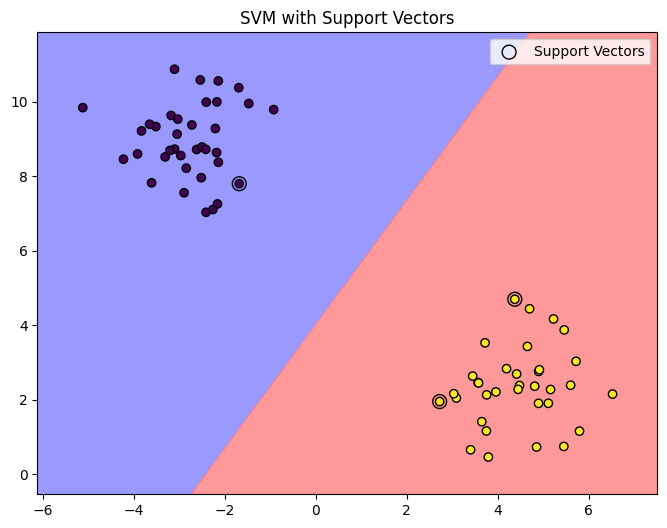

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Plot decision boundary and support vectors
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=plt.cm.bwr, levels=[-1, 0, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')
    ax.set_title('SVM with Support Vectors')
    ax.legend()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm, X_train, y_train, ax)
plt.show()


Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

## 1. Hyperplane
The hyperplane is the decision boundary that separates different classes in an SVM. For a binary classification problem in a 2D space, this is simply a line.



## Example:
Consider a 2D dataset where the classes are linearly separable.




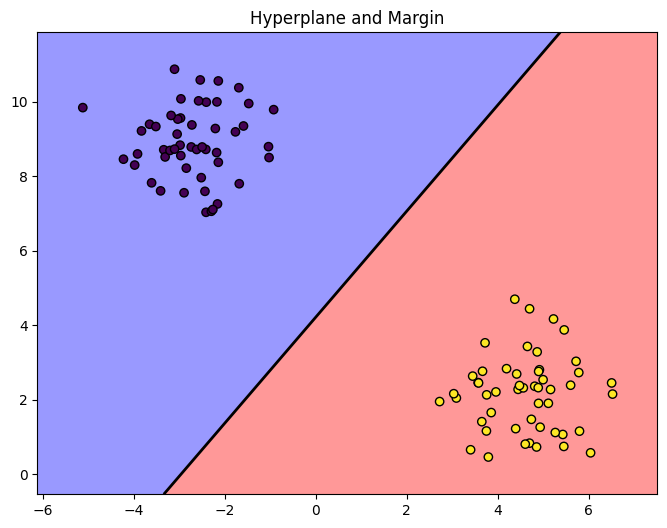

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# Train an SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Plot decision boundary and hyperplane
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=plt.cm.bwr, levels=[-1, 0, 1])
    ax.contour(xx, yy, Z, colors=['k'], levels=[0], linewidths=2)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title('Hyperplane and Margin')

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm, X, y, ax)
plt.show()


## Explanation:
* Hyperplane: Shown as the line where the decision function is zero.
* Margin: The distance between the hyperplane and the closest data points (support vectors) is the margin.


## 2. Marginal Plane
The marginal planes are parallel to the hyperplane and pass through the support vectors. They define the margin of the classifier.



## 3. Hard Margin
Hard Margin SVM is used when the data is perfectly linearly separable and there is no noise or overlap between classes. In this case, the goal is to find a hyperplane that separates the classes with a maximum margin and no misclassifications.



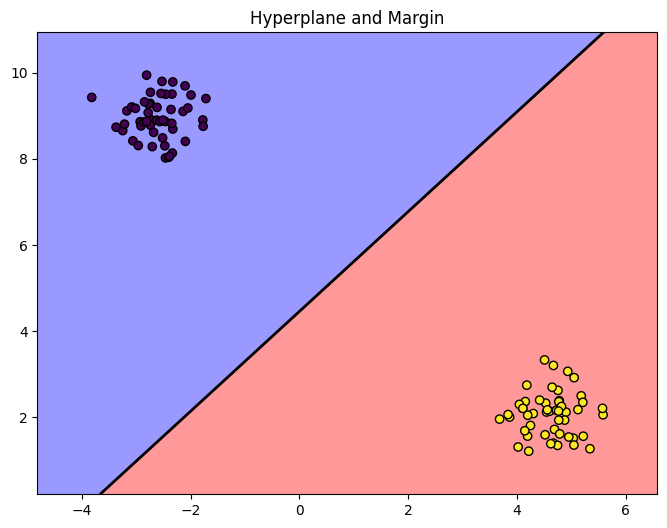

In [45]:
# Generate synthetic data with a clear separation
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=42)

# Train an SVM with a hard margin (large C value)
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X, y)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm_hard, X, y, ax)
plt.show()


Hard Margin: The margin is maximized, and no points are allowed to be within the margin or misclassified. The C parameter is set very high to enforce no misclassification.


## 4. Soft Margin
Soft Margin SVM allows for some misclassification, which is useful when dealing with noisy data or when classes are not perfectly separable. The C parameter controls the trade-off between maximizing the margin and minimizing classification errors.



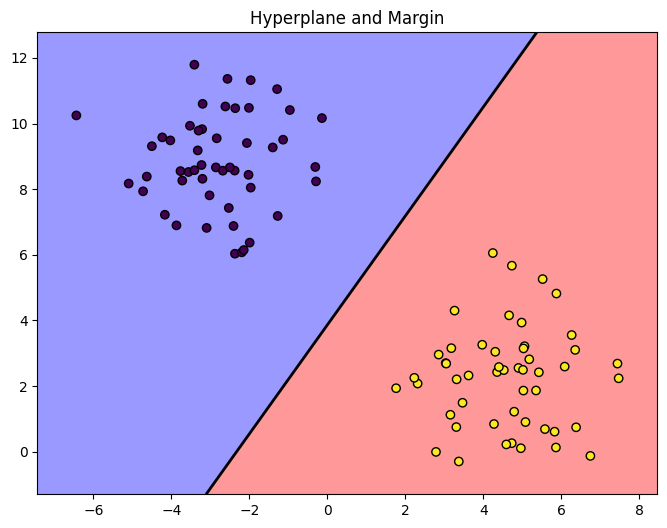

In [46]:
# Generate synthetic data with some overlap
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=42)

# Train an SVM with a soft margin (normal C value)
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X, y)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(svm_soft, X, y, ax)
plt.show()


Soft Margin: The margin is still maximized, but some points are allowed to be within the margin or misclassified. The C parameter is set to a moderate value to allow for some flexibility.


Q6. SVM Implementation through Iris dataset.

*  Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
*  Train a linear SVM classifier on the training set and predict the labels for the testing setl

* Compute the accuracy of the model on the testing setl

*  Plot the decision boundaries of the trained model using two of the featuresl
* Try different values of the regularisation parameter C and see how it affects the performance of
the model.

##1. Load the Iris Dataset and Split It


In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [48]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Train a Linear SVM Classifier


In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Train a linear SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
# Predict labels for the testing set
y_pred = clf.predict(X_test)
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


## 3. Plot Decision Boundaries
For plotting, we'll use only the first two features to make the visualization easier.



In [51]:
import numpy as np
import matplotlib.pyplot as plt
# Extract only the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
# Fit the classifier again with 2 features
clf_2d = SVC(kernel='linear', C=1.0)
clf_2d.fit(X_train_2d, y_train)

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

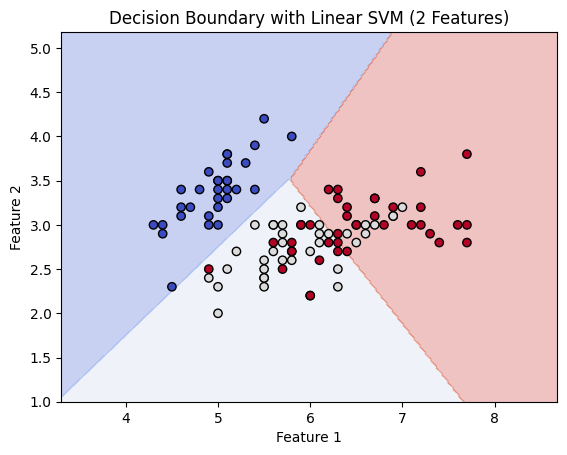

In [52]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Decision Boundary with Linear SVM (2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##4. Experiment with Different Values of the Regularization Parameter


In [53]:
Cs = [0.01, 0.1, 1, 10, 100]
for C in Cs:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train_2d, y_train)
    y_pred = clf.predict(X_test_2d)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with C={C}: {accuracy:.2f}')


Accuracy with C=0.01: 0.40
Accuracy with C=0.1: 0.82
Accuracy with C=1: 0.80
Accuracy with C=10: 0.80
Accuracy with C=100: 0.80


Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

Implementing a linear SVM classifier from scratch involves several steps, including defining the loss function, gradient descent, and training the model. After implementing the classifier, you can compare its performance with the scikit-learn implementation.
Here’s a step-by-step guide to building a simple linear SVM classifier from scratch and comparing it with scikit-learn's implementation.

## 1. Implement Linear SVM Classifier from Scratch


## 1.1. Define the SVM Classifier


In [56]:
import numpy as np

class LinearSVM:
    def __init__(self, C=1.0, learning_rate=0.001, n_iter=1000):
        self.C = C
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

        for _ in range(self.n_iter):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.W) + self.b) < 1:
                    self.W -= self.learning_rate * (self.C * (-y[i] * X[i]) + 2 * self.W)
                    self.b -= self.learning_rate * self.C * (-y[i])
                else:
                    self.W -= self.learning_rate * (2 * self.W)

    def predict(self, X):
        return np.sign(np.dot(X, self.W) + self.b)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


##1.2. Train and Evaluate the Custom SVM


In [57]:
# Initialize and train the custom LinearSVM
custom_svm = LinearSVM(C=1.0, learning_rate=0.001, n_iter=1000)
custom_svm.fit(X_train_2d, y_train)

# Evaluate the custom SVM on the test set
custom_accuracy = custom_svm.score(X_test_2d, y_test)
print(f'Custom SVM Accuracy: {custom_accuracy:.2f}')


Custom SVM Accuracy: 0.29


## 2. Compare with scikit-learn Implementation


In [58]:
# Train the scikit-learn LinearSVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Using the same C value
clf_sklearn = SVC(kernel='linear', C=1.0)
clf_sklearn.fit(X_train_2d, y_train)

# Predict and evaluate
y_pred_sklearn = clf_sklearn.predict(X_test_2d)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f'scikit-learn SVM Accuracy: {sklearn_accuracy:.2f}')


scikit-learn SVM Accuracy: 0.80
